In this script we want to build a minimal model of a neuron that exhibits the multiphasic responses we observe in PNs.

In [16]:
using DSP, PyPlot

In [186]:
dt = 1e-3;
T  = 5;
t  = 0:dt:T;
ton = 0.5;
dur = 1;
x = 4*float64((t.>=ton)&(t.<ton+dur));
tauPN = 0.05;
tauLN = tauPN*10;
pn = 0*x;
ln = 0*x;
vln = 0*ln;
vpn = 0*pn;
lnTh = 0.7;
lnBeta = 5;
for i = 2:length(t)
    dpndt = (-pn[i-1] + x[i] - vln[i-1] + 0.4);
    dlndt = (-ln[i-1] + vpn[i-1] + 0.2*x[i]);
    pn[i] = pn[i-1] + dpndt*dt/tauPN;
    ln[i] = ln[i-1] + dlndt*dt/tauLN;
    vln[i] = exp(lnBeta*(ln[i]-lnTh))
    vpn[i] = pn[i]*float64(pn[i]>0);
end    


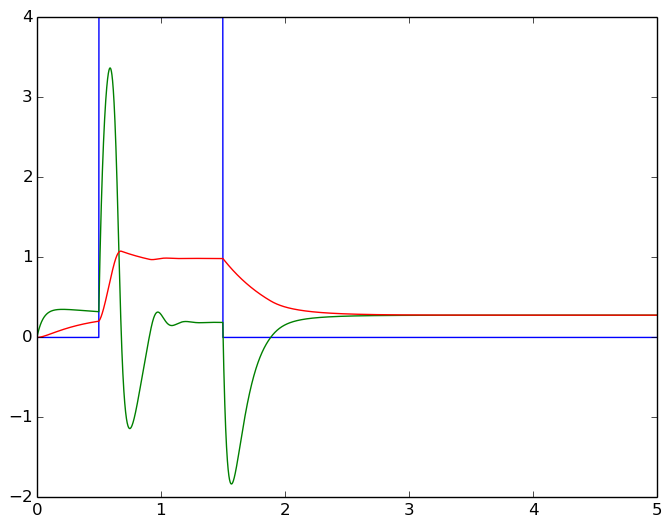

In [187]:
plot(t,[x pn ln]); show();

In [45]:
size([uPN uLN])

(5001,2)